# Task 3: Feature Engineering

In this task, we will perform feature engineering to create new, informative features, handle categorical variables, deal with missing values, and standardize or normalize numerical features. These steps are crucial to improve model performance.

### Import the nessesary library and data.

In [19]:
# Importing necessary libraries
import os
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt

os.chdir(r'c:\Users\ermias.tadesse\10x\BatiBank_CreditRisk_Model\Data')
# Load the dataset
file_path = 'data.csv'
data = pd.read_csv(file_path)

## 1. Create Aggregate Features

We'll start by creating aggregate features that summarize transaction data for each customer. These features include:
- **Total Transaction Amount**: The sum of all transaction amounts for each customer.
- **Average Transaction Amount**: The average transaction amount for each customer.
- **Transaction Count**: The number of transactions for each customer.
- **Standard Deviation of Transaction Amounts**: The variability of transaction amounts for each customer.

In [8]:
# Create aggregate features for each customer
aggregate_features = data.groupby('CustomerId').agg(
    total_transaction_amount=('Amount', 'sum'),
    avg_transaction_amount=('Amount', 'mean'),
    transaction_count=('TransactionId', 'count'),
    std_transaction_amount=('Amount', 'std')
).reset_index()

# Merging the aggregated features back into the main dataset
data = pd.merge(data, aggregate_features, on='CustomerId', how='left')

# Display the new features
print(data[['CustomerId', 'total_transaction_amount', 'avg_transaction_amount', 'transaction_count', 'std_transaction_amount']].head())


        CustomerId  total_transaction_amount  avg_transaction_amount  \
0  CustomerId_4406                 109921.75              923.712185   
1  CustomerId_4406                 109921.75              923.712185   
2  CustomerId_4683                   1000.00              500.000000   
3   CustomerId_988                 228727.20             6019.136842   
4   CustomerId_988                 228727.20             6019.136842   

   transaction_count  std_transaction_amount  
0                119             3042.294251  
1                119             3042.294251  
2                  2                0.000000  
3                 38            17169.241610  
4                 38            17169.241610  


The above code creates aggregate features for each customer and merges them back into the main dataset. These features summarize the transaction behavior of each customer, providing additional information that could improve model performance.

---

## 2. Extract Features

Next, we will extract features based on the transaction time, such as:
- **Transaction Hour**: The hour when the transaction occurred.
- **Transaction Day**: The day of the month when the transaction occurred.
- **Transaction Month**: The month when the transaction occurred.
- **Transaction Year**: The year when the transaction occurred.


In [9]:
# Convert 'TransactionStartTime' to datetime format
data['TransactionStartTime'] = pd.to_datetime(data['TransactionStartTime'])

# Extract time-related features
data['transaction_hour'] = data['TransactionStartTime'].dt.hour
data['transaction_day'] = data['TransactionStartTime'].dt.day
data['transaction_month'] = data['TransactionStartTime'].dt.month
data['transaction_year'] = data['TransactionStartTime'].dt.year

# Display the extracted features
print(data[['transaction_hour', 'transaction_day', 'transaction_month', 'transaction_year']].head())

   transaction_hour  transaction_day  transaction_month  transaction_year
0                 2               15                 11              2018
1                 2               15                 11              2018
2                 2               15                 11              2018
3                 3               15                 11              2018
4                 3               15                 11              2018


In [13]:
# Display the first few rows of the dataset with new features
data.head()

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,Amount,...,ProductCategory_financial_services,ProductCategory_movies,ProductCategory_other,ProductCategory_ticket,ProductCategory_transport,ProductCategory_tv,ProductCategory_utility_bill,ChannelId_ChannelId_2,ChannelId_ChannelId_3,ChannelId_ChannelId_5
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,UGX,256,ProviderId_6,ProductId_10,-0.046371,...,False,False,False,False,False,False,False,False,True,False
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,UGX,256,ProviderId_4,ProductId_6,-0.054643,...,True,False,False,False,False,False,False,True,False,False
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,UGX,256,ProviderId_6,ProductId_1,-0.050426,...,False,False,False,False,False,False,False,False,True,False
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,UGX,256,ProviderId_1,ProductId_21,0.107717,...,False,False,False,False,False,False,True,False,True,False
4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,UGX,256,ProviderId_4,ProductId_6,-0.059704,...,True,False,False,False,False,False,False,True,False,False


Here, we extract time-related features that could be important for understanding customer behavior patterns, such as the time of day or year when transactions occur.

---

## 3. Encode Categorical Variables

Categorical variables need to be converted into numerical format to be used by machine learning models. We will apply:
- **One-Hot Encoding**: Converts categorical values into binary vectors.
- **Label Encoding**: Assigns unique integers to each category.


In [10]:
# One-Hot Encoding for 'ProductCategory' and 'ChannelId'
data = pd.get_dummies(data, columns=['ProductCategory', 'ChannelId'], drop_first=True)

# Label Encoding for 'FraudResult'
label_encoder = LabelEncoder()
data['FraudResult'] = label_encoder.fit_transform(data['FraudResult'])

# Display the encoded features
print(data.head())


         TransactionId         BatchId       AccountId       SubscriptionId  \
0  TransactionId_76871   BatchId_36123  AccountId_3957   SubscriptionId_887   
1  TransactionId_73770   BatchId_15642  AccountId_4841  SubscriptionId_3829   
2  TransactionId_26203   BatchId_53941  AccountId_4229   SubscriptionId_222   
3    TransactionId_380  BatchId_102363   AccountId_648  SubscriptionId_2185   
4  TransactionId_28195   BatchId_38780  AccountId_4841  SubscriptionId_3829   

        CustomerId CurrencyCode  CountryCode    ProviderId     ProductId  \
0  CustomerId_4406          UGX          256  ProviderId_6  ProductId_10   
1  CustomerId_4406          UGX          256  ProviderId_4   ProductId_6   
2  CustomerId_4683          UGX          256  ProviderId_6   ProductId_1   
3   CustomerId_988          UGX          256  ProviderId_1  ProductId_21   
4   CustomerId_988          UGX          256  ProviderId_4   ProductId_6   

    Amount  ...  ProductCategory_financial_services ProductCategory_

The above code applies One-Hot Encoding for multi-category features like `ProductCategory` and `ChannelId`, and Label Encoding for binary features like `FraudResult`. This ensures that all categorical features are in numerical format, ready for modeling.

---

## 4. Handle Missing Values

We will now handle missing values. Depending on the amount and nature of the missing data, we can either:
- **Impute**: Fill missing values with statistical measures (mean, median, mode, etc.).
- **Remove**: Remove rows or columns with missing values if they are few and insignificant.


In [14]:
# Checking for missing values again
print(data.isnull().sum())

# Imputation example: Fill missing values in 'std_transaction_amount' with the mean
# data['std_transaction_amount'].fillna(data['std_transaction_amount'].mean(), inplace=True)


TransactionId                         0
BatchId                               0
AccountId                             0
SubscriptionId                        0
CustomerId                            0
CurrencyCode                          0
CountryCode                           0
ProviderId                            0
ProductId                             0
Amount                                0
Value                                 0
TransactionStartTime                  0
PricingStrategy                       0
FraudResult                           0
total_transaction_amount              0
avg_transaction_amount                0
transaction_count                     0
std_transaction_amount                0
transaction_hour                      0
transaction_day                       0
transaction_month                     0
transaction_year                      0
ProductCategory_data_bundles          0
ProductCategory_financial_services    0
ProductCategory_movies                0


The code checks for missing values and handles them by imputing the mean value for the `std_transaction_amount` feature. This ensures no missing data is left, which could disrupt model training.

---

## 5. Normalize/Standardize Numerical Features

To bring all numerical features to a similar scale, we will either:
- **Normalize**: Scale the data to a range of [0, 1].
- **Standardize**: Scale the data to have a mean of 0 and a standard deviation of 1.


In [15]:
# Choosing Standardization for this example
scaler = StandardScaler()

# List of numerical features to be standardized
numerical_features = ['Amount', 'Value', 'total_transaction_amount', 'avg_transaction_amount', 'std_transaction_amount']

# Standardizing the features
data[numerical_features] = scaler.fit_transform(data[numerical_features])

# Display standardized features
data[numerical_features].head()


,Amount,Value,total_transaction_amount,avg_transaction_amount,std_transaction_amount
0,-0.046371,-0.072291,0.170118,-0.067623,-0.168551
1,-0.054643,-0.080251,0.170118,-0.067623,-0.168551
2,-0.050426,-0.076352,0.165122,-0.072568,-0.202748
3,0.107717,0.096648,0.175567,-0.008155,-0.009754
4,-0.059704,-0.075183,0.175567,-0.008155,-0.009754


The code standardizes selected numerical features so they have a mean of 0 and a standard deviation of 1. This is useful for many machine learning algorithms that are sensitive to the scale of input features.

---

### Conclusion

In this notebook, we performed essential feature engineering tasks, including creating aggregate features, extracting time-based features, encoding categorical variables, handling missing values, and standardizing numerical features. These steps are critical for preparing the data for effective model training.


In [26]:
# 1. Construct Default Estimator (Proxy)
data['TransactionStartTime'] = pd.to_datetime(data['TransactionStartTime']).dt.tz_localize(None)
# Calculate RFMS scores for each user
rfms_scores = data.groupby('CustomerId').agg(
    Recency=('TransactionStartTime', lambda x: (pd.Timestamp.now() - x.max()).days),
    Frequency=('TransactionId', 'count'),
    Monetary=('Amount', 'sum')
).reset_index()

# Display the first few rows of RFMS scores
rfms_scores.head()

,CustomerId,Recency,Frequency,Monetary
0,CustomerId_1,2143,1,-10000.0
1,CustomerId_10,2143,1,-10000.0
2,CustomerId_1001,2149,5,20000.0
3,CustomerId_1002,2086,11,4225.0
4,CustomerId_1003,2071,6,20000.0


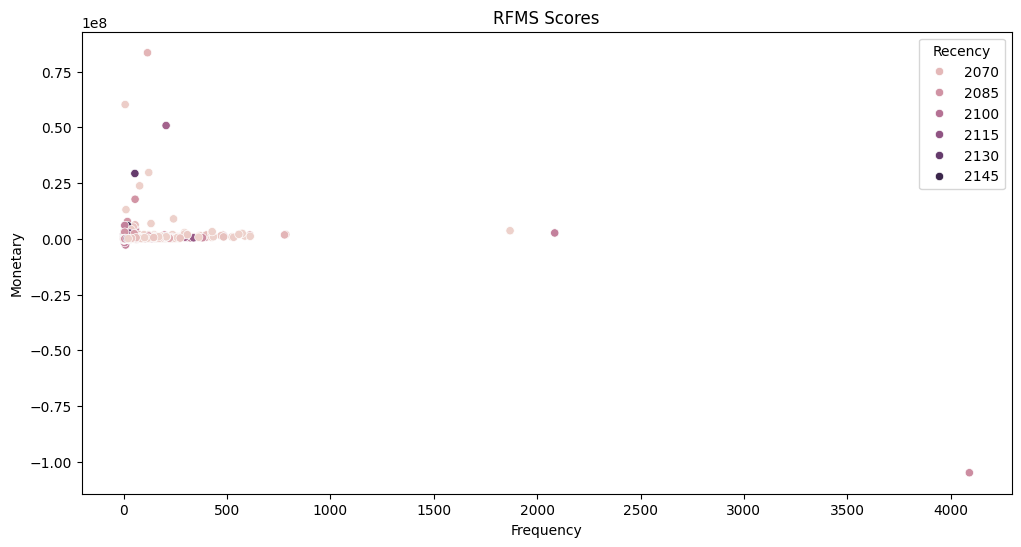

In [27]:
# Visualize RFMS scores
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Frequency', y='Monetary', hue='Recency', data=rfms_scores)
plt.xlabel('Frequency')
plt.ylabel('Monetary')
plt.title('RFMS Scores')
plt.show()

In [28]:
# 2. Assign Good and Bad Labels
# Define boundary values
high_freq_boundary = rfms_scores['Frequency'].quantile(0.75)
high_monetary_boundary = rfms_scores['Monetary'].quantile(0.75)
low_recency_boundary = rfms_scores['Recency'].quantile(0.25)

# Assign labels based on boundary
rfms_scores['Label'] = 'Good'
rfms_scores.loc[(rfms_scores['Frequency'] <= high_freq_boundary) & 
                (rfms_scores['Monetary'] <= high_monetary_boundary) & 
                (rfms_scores['Recency'] >= low_recency_boundary), 'Label'] = 'Bad'

# Display the first few rows of RFMS scores with labels
rfms_scores

,CustomerId,Recency,Frequency,Monetary,Label
0,CustomerId_1,2143,1,-10000.0,Bad
1,CustomerId_10,2143,1,-10000.0,Bad
2,CustomerId_1001,2149,5,20000.0,Bad
3,CustomerId_1002,2086,11,4225.0,Bad
4,CustomerId_1003,2071,6,20000.0,Bad
...,...,...,...,...,...
3737,CustomerId_992,2065,6,20000.0,Bad
3738,CustomerId_993,2085,5,20000.0,Bad
3739,CustomerId_994,2060,101,543873.0,Good
3740,CustomerId_996,2127,17,139000.0,Good


In [29]:
def calculate_woe_iv(data, feature, target):
    # Initialize list to store WoE and IV values
    lst = []
    
    # Loop through each unique category
    for i in range(data[feature].nunique()):
        val = list(data[feature].unique())[i]
        df = data[data[feature] == val]
        good = len(df[df[target] == 0])
        bad = len(df[df[target] == 1])
        lst.append([val, good, bad])
    
    # Create a DataFrame to hold WoE and IV values
    woe_df = pd.DataFrame(lst, columns=[feature, 'Good', 'Bad'])
    woe_df['Distr_Good'] = woe_df['Good'] / woe_df['Good'].sum()
    woe_df['Distr_Bad'] = woe_df['Bad'] / woe_df['Bad'].sum()
    woe_df['WoE'] = np.log(woe_df['Distr_Good'] / woe_df['Distr_Bad'])
    woe_df['IV'] = (woe_df['Distr_Good'] - woe_df['Distr_Bad']) * woe_df['WoE']
    
    # Calculate total Information Value
    iv = woe_df['IV'].sum()
    
    return woe_df, iv

woe_df, iv = calculate_woe_iv(data, 'ProductCategory', 'FraudResult')
print(woe_df)
print(f'Total IV for ProductCategory: {iv}')

      ProductCategory   Good  Bad  Distr_Good  Distr_Bad       WoE        IV
0             airtime  45009   18    0.471451   0.093264  1.620379  0.612807
1  financial_services  45244  161    0.473913   0.834197 -0.565446  0.203721
2        utility_bill   1908   12    0.019986   0.062176 -1.134962  0.047885
3        data_bundles   1613    0    0.016896   0.000000       inf       inf
4                  tv   1279    0    0.013397   0.000000       inf       inf
5           transport     23    2    0.000241   0.010363 -3.761520  0.038073
6              ticket    216    0    0.002263   0.000000       inf       inf
7              movies    175    0    0.001833   0.000000       inf       inf
8               other      2    0    0.000021   0.000000       inf       inf
Total IV for ProductCategory: inf
